<a href="https://colab.research.google.com/github/Milena883/Algorithmization-and-programming_Vishnevskaya/blob/main/27_05_2023_visualization_with_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация с помощью Seaborn

Matplotlib оказался невероятно полезным и популярным инструментом визуализации, но даже заядлые пользователи признают, что он зачастую оставляет желать лучшего. Часто возникает несколько обоснованных жалоб на Matplotlib:

До версии 2.0 значения по умолчанию Matplotlib не были лучшим выбором. Он был основан на MATLAB примерно в 1999 году, и это часто проявляется. API Matplotlib имеет относительно низкий уровень. Выполнение сложной статистической визуализации возможно, но часто требует большого количества шаблонного кода. Matplotlib появился более чем на десять лет раньше Pandas и поэтому не предназначен для использования с Pandas DataFrames. Чтобы визуализировать данные из DataFrame Pandas, вы должны извлечь каждую серию и часто объединять их вместе в правильный формат. Было бы лучше иметь библиотеку графиков, которая могла бы разумно использовать метки DataFrame в графике. Ответом на эти проблемы является Seaborn. Seaborn предоставляет API поверх Matplotlib, который предлагает разумный выбор стиля графика и цветов по умолчанию, определяет простые функции высокого уровня для распространенных типов статистических графиков и интегрируется с функциями, предоставляемыми Pandas DataFrames.

Честно говоря, команда Matplotlib решает эту проблему: недавно она добавила инструменты plt.style, обсуждаемые в разделе «Настройка Matplotlib: конфигурации и таблицы стилей», и начинает более плавно обрабатывать данные Pandas. Версия библиотеки 2.0 будет включать новую таблицу стилей по умолчанию, которая улучшит существующее положение дел. Но по всем только что рассмотренным причинам Seaborn остается чрезвычайно полезным дополнением.

# Seaborn против Matplotlib

Вот пример простого графика случайного блуждания в Matplotlib с использованием классического форматирования графика и цветов. Начнем с типичного импорта:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('classic')

# Используйте следующую строку только в Jupyter-ноутбуках
# %matplotlib inline

Этот код подготавливает среду для работы с данными в Python, обеспечивая возможность их визуализации и анализа. Он является базовым стартовым набором для любого проекта, связанного с графиками и обработкой данных.

Теперь мы создаем данные случайного блуждания:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

В этой части кода создаются два массива: x, представляющий ось X от 0 до 10, и y, содержащий 6 временных рядов со случайными накопленными значениями. Эти данные могут быть использованы для построения графиков и анализа, например, для визуализации изменений во времени.

И сделать простой график:

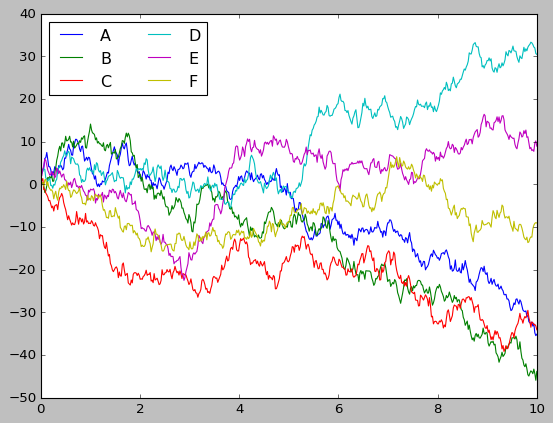

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Этот фрагмент кода строит линейный график для массивов x и y с 6 временными рядами, используя параметры по умолчанию для графиков в matplotlib. Легенда с подписями к линиям расположена в верхнем левом углу и состоит из двух колонок, что создает более аккуратный и организованный вид визуализации.

Хотя результат содержит всю информацию, которую мы хотели бы передать, он сделан не самым эстетически привлекательным образом и даже выглядит немного устаревшим в контексте визуализации данных XXI века.

Теперь давайте посмотрим, как это работает с Seaborn. Как мы увидим, Seaborn имеет множество собственных высокоуровневых методов построения графиков, но он также может переписывать параметры по умолчанию Matplotlib и, в свою очередь, заставлять даже простые скрипты Matplotlib производить значительно более качественный вывод. Мы можем задать стиль, вызвав метод set() библиотеки Seaborn. По умолчанию Seaborn импортируется как sns:

In [ ]:
import seaborn as sns
sns.set()

Теперь давайте повторим те же две строки, что и раньше:

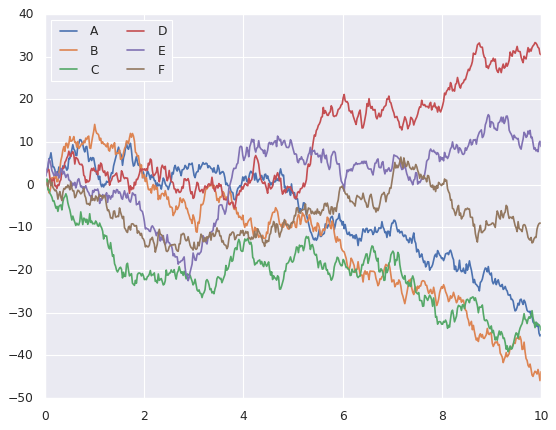

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Этот участок кода повторяет тот же процесс построения графика, что и предыдущий, где построены линии для данных из массивов x и y, и добавлена легенда с подписями. Он также позволяет пользователю визуализировать 6 временных рядов с соответствующими метками в легенде.

 Ах, гораздо лучше!

# Исследование участков Сиборна
Основная идея Seaborn заключается в том, что он предоставляет команды высокого уровня для создания различных типов графиков, полезных для исследования статистических данных и даже для некоторой настройки статистических моделей.

Давайте взглянем на несколько наборов данных и типов графиков, доступных в Seaborn. Обратите внимание, что все следующее можно сделать с помощью необработанных команд Matplotlib (это, по сути, то, что Seaborn делает «под капотом»), но Seaborn API гораздо удобнее.

# Гистограммы, KDE и плотности

Часто при визуализации статистических данных все, что вам нужно, — это построить гистограммы и совместные распределения переменных. Мы видели, что в Matplotlib это относительно просто:

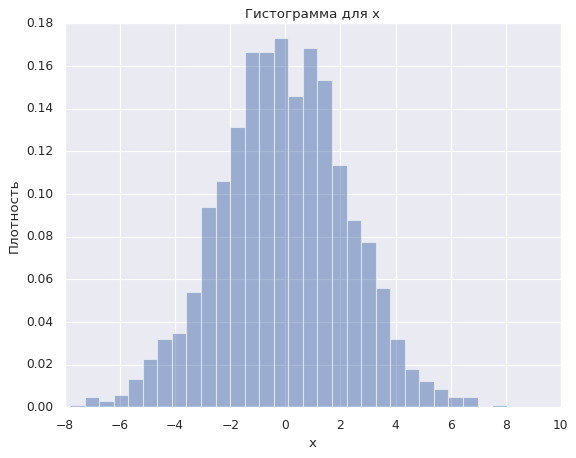

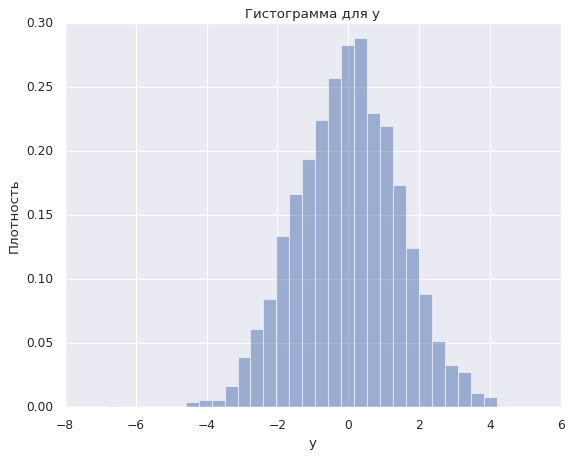

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Визуализация гистограмм
for col in ['x', 'y']:
    plt.hist(data[col], density=True, alpha=0.5, bins=30)  # используют density вместо normed
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.show()  # Показываем каждую гистограмму сразу


Этот код генерирует случайные данные из многомерного нормального распределения и создает по одной гистограмме для переменных x и y, визуализируя их плотности. Благодаря использованию pandas и matplotlib, код работает эффективно, обеспечивая простоту визуализации и анализа данных.

Вместо гистограммы мы можем получить плавную оценку распределения, используя оценку плотности ядра, что Сиборн делает с помощью sns.kdeplot:

<ipython-input-8-929878336419>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-8-929878336419>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


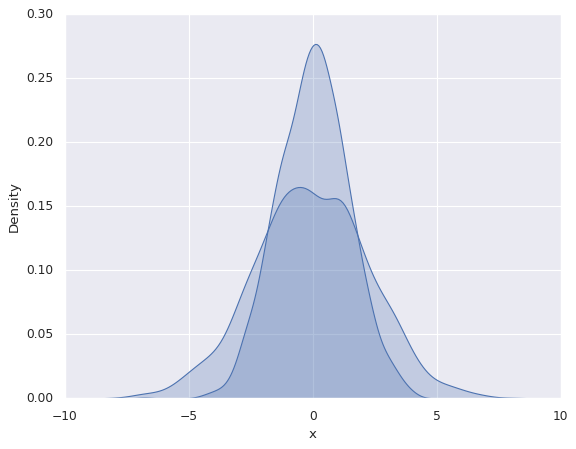

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Таким образом, данный код визуализирует плотности распределения переменных x и y из DataFrame data, создавая для каждой переменной график плотности ядра с использованием Seaborn. Этот подход позволяет лучше понять распределение данных и выявить, есть ли в них какие-либо особенности, такие как моды или направления.

Гистограммы и KDE можно объединить с помощью distplot:

<ipython-input-9-f74e07db4076>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
<ipython-input-9-f74e07db4076>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y']);


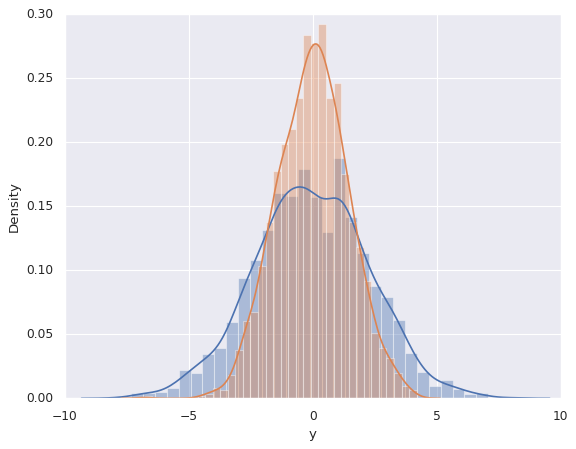

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);

Данный код визуализирует распределения переменных x и y из DataFrame data. Он создает графики, которые совмещают гистограммы и плотности оценивания, позволяя лучше понимать, как значения каждой переменной распределены.

Мы можем увидеть совместное распределение и предельные распределения вместе, используя sns.jointplot. Для этого графика мы установим стиль белого фона:

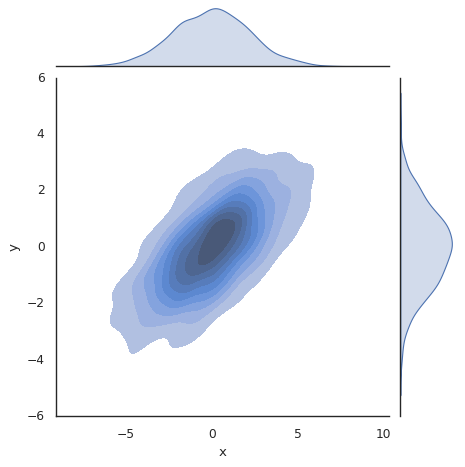

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Создание совместного графика
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde', fill=True)
    plt.show()  # Показываем график

Этот код генерирует двухмерное многомерное нормальное распределение и визуализирует его с помощью совместного графика, который показывает как точечное распределение, так и плотность значений переменных x и y. Использование KDE и заливки позволяет выделить области с высокой вероятностью, делая график более информативным и наглядным.

Если мы передадим полный двумерный набор данных в kdeplot, мы получим двумерную визуализацию данных:

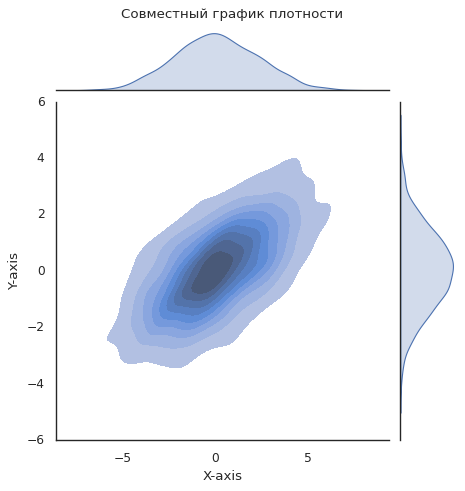

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Создание совместного графика плотности
with sns.axes_style('white'):
    g = sns.jointplot(x="x", y="y", data=data, kind='kde', fill=True)
    plt.xlabel('X-axis')  # Метка оси X
    plt.ylabel('Y-axis')  # Метка оси Y
    plt.suptitle('Совместный график плотности', y=1.02)  # Заголовок
    plt.show()  # Отображаем график


Этот код создает совместный график плотности для переменных x и y, отображая их распределение и характеристики. Использование заливки и KDE позволяет лучше воспринимать области с высокой и низкой плотностью данных. Настройка меток и заголовка делает график более полезным для интерпретации.

Есть и другие параметры, которые можно передать в Jointplot — например, вместо этого мы можем использовать шестиугольную гистограмму:

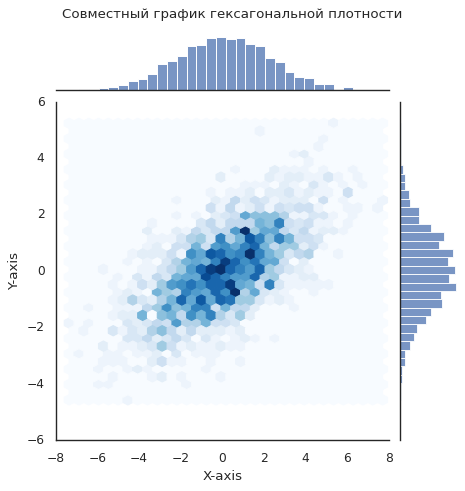

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Создание совместного графика с гексагональной плотностью
with sns.axes_style('white'):
    g = sns.jointplot(x="x", y="y", data=data, kind='hex', cmap='Blues')
    plt.xlabel('X-axis')  # Метка оси X
    plt.ylabel('Y-axis')  # Метка оси Y
    plt.suptitle('Совместный график гексагональной плотности', y=1.02)  # Заголовок
    plt.show()  # Отображаем график


Данный код создает совместный график гексагональной плотности, визуализируя распределение случайных точек переменных x и y. Гексагональный график позволяет лучше визуализировать плотности данных, особенно когда количество точек велико, так как он группирует точки в шестиугольные ячейки. Это помогает легко идентифицировать области с высокой плотностью.

# Парные сюжеты

Когда вы обобщаете совместные графики на наборы данных большего размера, вы получаете парные графики. Это очень полезно для изучения корреляций между многомерными данными, когда вы хотите построить график всех пар значений друг против друга.

Мы продемонстрируем это на хорошо известном наборе данных Iris, в котором перечислены размеры лепестков и чашелистиков трех видов ирисов:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализировать многомерные отношения между образцами так же просто, как вызвать sns.pairplot:

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


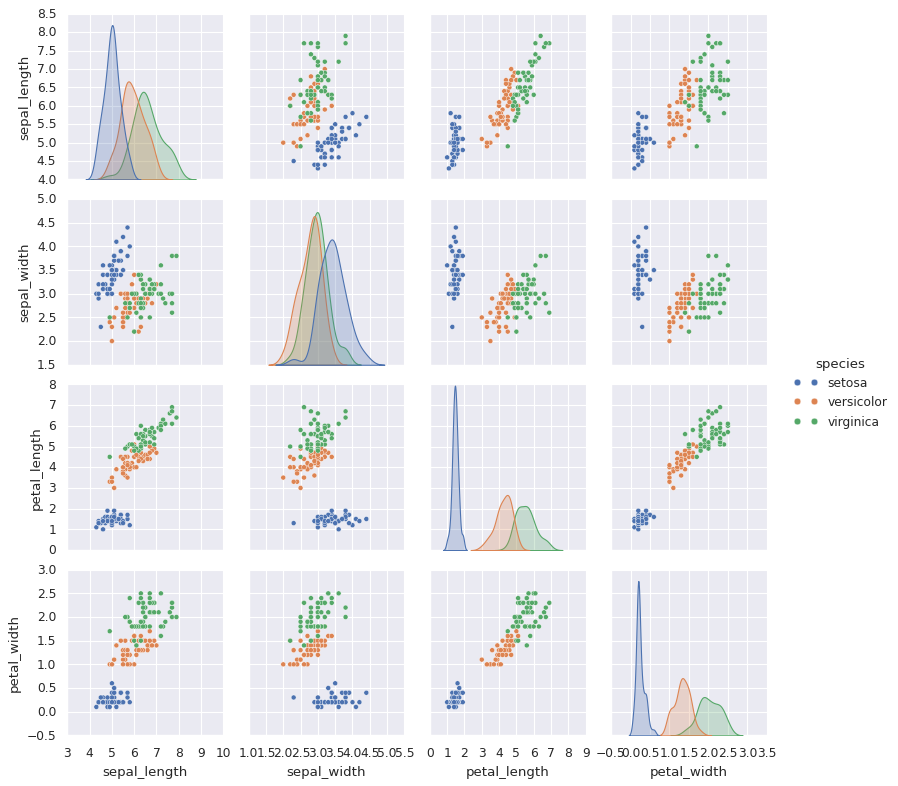

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

В результате выполнения sns.pairplot(iris, hue='species', size=2.5); будет создана матрица графиков, где каждая ячейка показывает распределение данных для двух переменных (например, длина и ширина лепестков), а различные виды ириса будут окрашены в разные цвета. Это дает возможность обсмотреть данные более детально и понять, как разные переменные связаны между собой, а также как они различаются по видам, что очень полезно в задачах визуальной разведки данных (EDA)

# Фасетные гистограммы

 Иногда лучший способ просмотра данных — это гистограммы подмножеств. FacetGrid от Seaborn делает это чрезвычайно простым. Мы рассмотрим некоторые данные, которые показывают сумму, которую персонал ресторана получает в виде чаевых, на основе данных различных показателей:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


В результате выполнения этих строк кода вы получите доступ к набору данных о чаевых и сможете увидеть первые 5 записей, что полезно для предварительного анализа и понимания структуры данных. Это позволяет разработчику или исследователю быстрее понять, какие данные доступны и в каком формате они представлены.

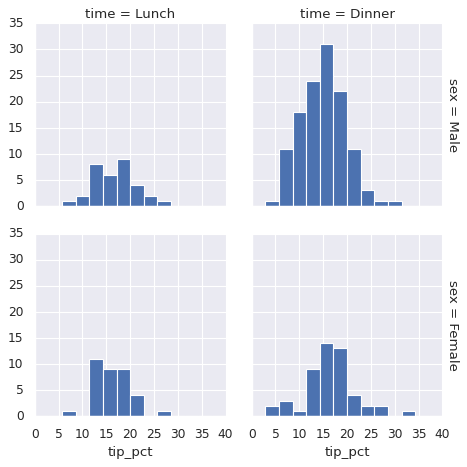

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

В результате выполнения этого кода будет создана сетка гистограмм, которая показывает распределение процентов чаевых для различных категорий: по полу клиента (мужчина/женщина) и времени обслуживания (обед/ужин). Это позволяет легко сравнивать, как разные группы клиентов оставляют чаевые в зависимости от времени дня.

# Факторные графики

Факторные графики также могут быть полезны для такого типа визуализации. Это позволяет просматривать распределение параметра внутри интервалов, определяемых любым другим параметром:

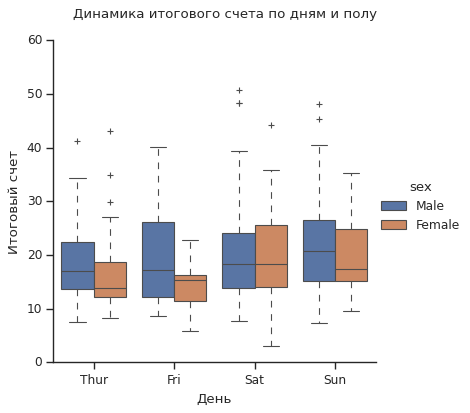

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что данные `tips` уже загружены и доступны
# fs от seaborn, например, через команду:
# tips = sns.load_dataset("tips")

# Создание графика с использованием catplot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("День", "Итоговый счет")  # Изменяем подписи осей
    g.fig.suptitle('Динамика итогового счета по дням и полу', y=1.03)  # Заголовок
    plt.show()  # Отображаем график


В результате выполнения этого кода будет создан ящичковый график, который показывает распределение итогового счета (total_bill) для разных дней недели, разделённое по полу клиентов (мужчины и женщины). Это позволяет визуализировать и сравнить, как итоговые счета различаются не только по дням, но и по половой принадлежности клиента.

# Совместные распределения

Подобно парному графику, который мы видели ранее, мы можем использовать sns.jointplot, чтобы показать совместное распределение между различными наборами данных, а также связанные с ним маргинальные распределения:

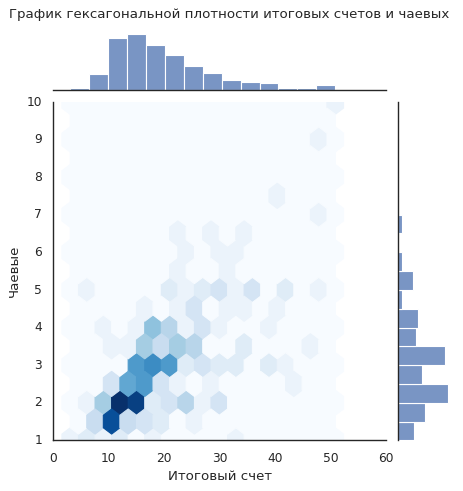

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что данные `tips` уже загружены
# например, через команду:
# tips = sns.load_dataset("tips")

# Создание совместного графика с гексагональной плотностью
with sns.axes_style('white'):
    g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex', cmap='Blues')
    g.set_axis_labels("Итоговый счет", "Чаевые")  # Подписи осей
    plt.suptitle('График гексагональной плотности итоговых счетов и чаевых', y=1.02)  # Заголовок
    plt.show()  # Отображение графика

В результате выполнения этого кода будет создан гексагональный график плотности, который показывает взаимосвязь между итоговыми счетами (total_bill) и чаевыми (tip). Каждая гексагональная ячейка отображает концентрацию точек, где наблюдаются более высокие значения. Это помогает выявить закономерности и тренды в данных, позволяя лучше понять, как суммы чаевых зависят от общего счета.

Совместный график может даже выполнять автоматическую оценку плотности ядра и регрессию:

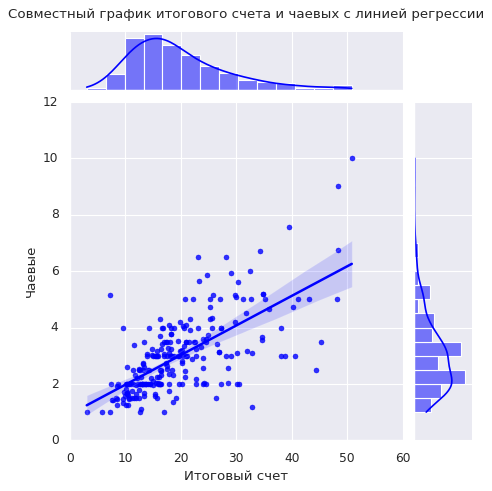

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных tips
tips = sns.load_dataset("tips")

# Создание совместного графика с линией регрессии
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg', color='blue')
plt.suptitle('Совместный график итогового счета и чаевых с линией регрессии', y=1.02)  # Заголовок
plt.xlabel('Итоговый счет')  # Подпись оси X
plt.ylabel('Чаевые')         # Подпись оси Y
plt.show()  # Отображение графика

В результате выполнения этого кода будет создан совместный график, показывающий взаимосвязь между итоговым счетом (total_bill) и чаевыми (tip), с наложенной линией регрессии, которая иллюстрирует тренд между этими переменными. Такой график помогает понять, существуют ли закономерности в данных, и позволяет оценить влияние итогового счета на размер чаевых.

# Барные участки

Временные ряды можно построить с помощью sns.factorplot. В следующем примере мы будем использовать данные «Планеты», которые мы впервые увидели в разделе «Агрегация и группировка»:

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


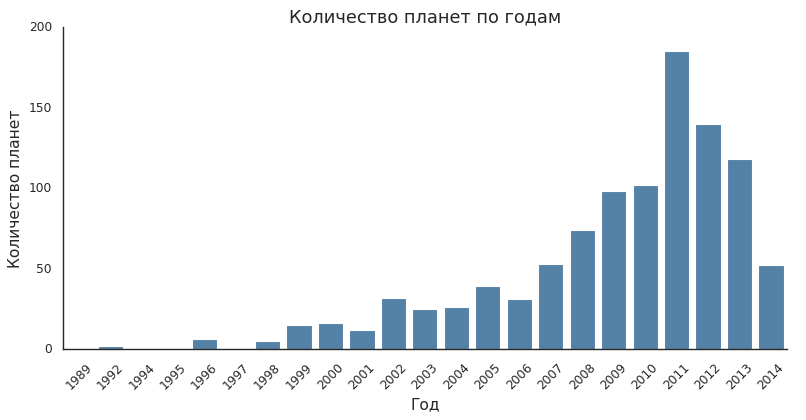

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что данные planets уже загружены
# Например, можно загрузить данные следующим образом:
# planets = sns.load_dataset("planets")

# Создание графика
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(rotation=45)  # Поворачиваем метки по оси X для лучшей видимости
    plt.title('Количество планет по годам', fontsize=16)  # Заголовок
    plt.xlabel('Год', fontsize=14)  # Подпись оси X
    plt.ylabel('Количество планет', fontsize=14)  # Подпись оси Y
    plt.show()  # Отображаем график

В результате выполнения этого кода будет создан график, показывающий количество открытых экзопланет, сгруппированных по годам. Это позволяет исследовать тренды в открытии планет: можно видеть, в какие годы было больше всего открытий, а в какие — меньше. Такой график может быть полезным для анализа роста интереса к астрономии и к поиску экзопланет.

Мы можем узнать больше, рассмотрев метод открытия каждой из этих планет:

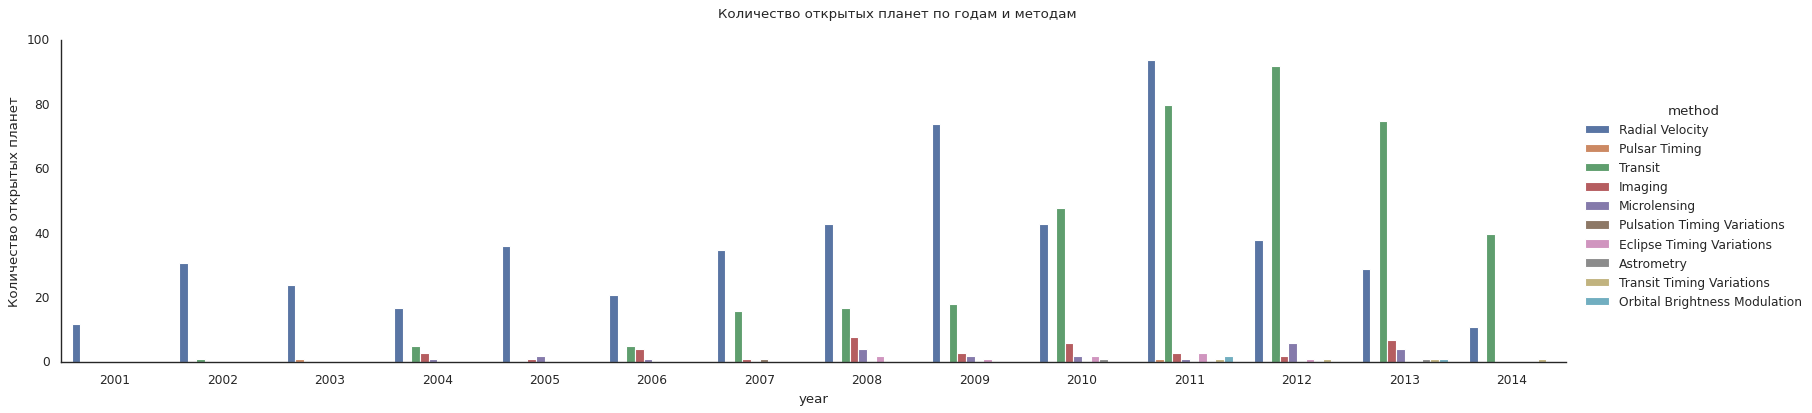

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что данные planets уже загружены
# Например, данные можно загрузить следующим образом:
# planets = sns.load_dataset("planets")

# Создание графика с использованием catplot
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Количество открытых планет')  # Подпись оси Y
    g.fig.suptitle('Количество открытых планет по годам и методам', y=1.03)  # Заголовок
    plt.show()  # Отображение графика

В результате выполнения этого кода будет создан график, показывающий количество открытых экзопланет по годам, сгруппированным по методам их обнаружения. Это позволяет визуально оценить, какие методы были наиболее продуктивными в разные годы и как менялся интерес к открытию экзопланет с течением времени. График эффективно передает информацию и позволяет быстро анализировать тренды в астрономических открытиях.

Дополнительную информацию о построении графиков с помощью Seaborn см. в документации Seaborn, [учебнике](http://seaborn.pydata.org/tutorial.htm) и галерее Seaborn.

# Пример: изучение времени окончания марафона

Здесь мы рассмотрим использование Seaborn для визуализации и понимания результатов марафона. Я собрал данные из источников в Интернете, агрегировал их, удалил любую идентифицирующую информацию и разместил на GitHub, где их можно скачать (если вы заинтересованы в использовании Python для очистки веб-страниц, я бы порекомендовал веб-скрапинг с Python от Райана Митчелла). Мы начнем с загрузки данных из Интернета и загрузки их в Pandas:

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

По умолчанию Pandas загружает столбцы времени в виде строк Python (тип объекта); мы можем увидеть это, посмотрев на атрибут dtypes DataFrame:

In [ ]:
data.dtypes

,0
x,float64
y,float64


Пунктирная линия показывает, где будет находиться время человека, если он пробежит марафон в совершенно устойчивом темпе. Тот факт, что распределение находится выше этого значения, указывает (как и следовало ожидать), что большинство людей замедляют темп марафона. Если вы участвовали в соревнованиях, вы знаете, что о тех, кто делает противоположное — бежит быстрее во второй половине забега, — говорят, что они «отрицательно разделили» забег.

Давайте создадим еще один столбец в данных, долю разделения, которая измеряет степень, в которой каждый бегун разделяет забег на отрицательное или положительное разделение:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,split,final,split_sec,final_sec,split_frac
0,0 days 01:20:00,0 days 02:10:00,4800.0,7800.0,-0.230769
1,0 days 01:30:00,0 days 02:25:00,5400.0,8700.0,-0.241379
2,0 days 01:15:00,0 days 01:55:00,4500.0,6900.0,-0.304348
3,0 days 01:40:00,0 days 02:45:00,6000.0,9900.0,-0.212121
4,0 days 01:45:00,0 days 02:50:00,6300.0,10200.0,-0.235294


Если эта разница меньше нуля, человек разделил расу на эту долю отрицательно. Давайте построим график распределения этой разделенной фракции:

<ipython-input-46-cef9f0a42e1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['split_frac'], kde=False);


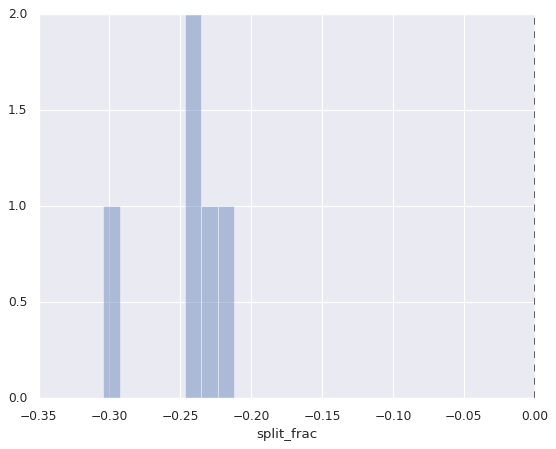

In [ ]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

В результате выполнения этого кода мы получаем гистограмму, показывающую распределение значений в столбце split_frac, с добавленной вертикальной пунктирной линией на уровне 0. Это может быть полезно для визуального анализа, чтобы определить, как значения распределены относительно нуля, например, показывая, есть ли больше положительных или отрицательных значений. Такой подход может помочь в исследовании данных и выявлении привлекательных особенностей или паттернов в распределении.

In [ ]:
sum(data.split_frac < 0)

5

Из почти 40 000 участников только 250 человек разделили свой марафон с отрицательным результатом.

Давайте посмотрим, есть ли какая-либо корреляция между этой дробной долей и другими переменными. Мы сделаем это, используя парную сетку, которая рисует графики всех этих корреляций:

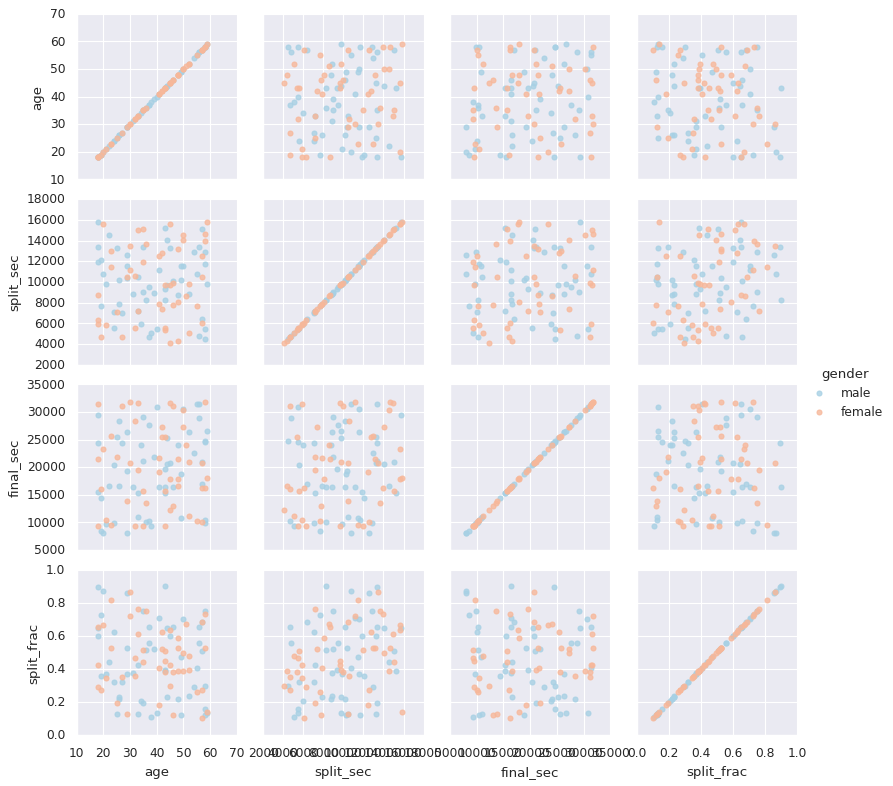

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
data_dict = {
    'age': np.random.randint(18, 60, size=100),
    'split_sec': np.random.uniform(4000, 16000, size=100),
    'final_sec': np.random.uniform(8000, 32000, size=100),
    'split_frac': np.random.uniform(0.1, 0.9, size=100),
    'gender': np.random.choice(['male', 'female'], size=100)
}

# Преобразование в DataFrame
data = pd.DataFrame(data_dict)

# Создание PairGrid
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

# Отображение графиков
plt.show()

В результате выполнения этого кода создается сетка графиков, которая визуализирует взаимосвязи между переменными age, split_sec, final_sec и split_frac, с использованием разных цветов для мужчин и женщин. Это позволяет исследовать, как различные факторы могут быть связаны друг с другом и как они могут различаться в зависимости от пола. Такой подход дает возможность получать инсайты из данных и выявлять закономерности.

Похоже, что дробная доля не коррелирует конкретно с возрастом, но коррелирует с итоговым временем: более быстрые бегуны, как правило, имеют более близкое к равномерному разделение времени на марафоне. (Здесь мы видим, что Seaborn не является панацеей от проблем Matplotlib, когда дело касается стилей графиков: в частности, метки оси X перекрываются. Однако, поскольку выходные данные представляют собой простой график Matplotlib, методы в настройке тиков можно использовать для настройки таких вещей, если это необходимо.)

Разница между мужчинами и женщинами здесь интересна. Давайте посмотрим на гистограмму дробных фракций для этих двух групп:

<ipython-input-50-5c579a589826>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
<ipython-input-50-5c579a589826>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)


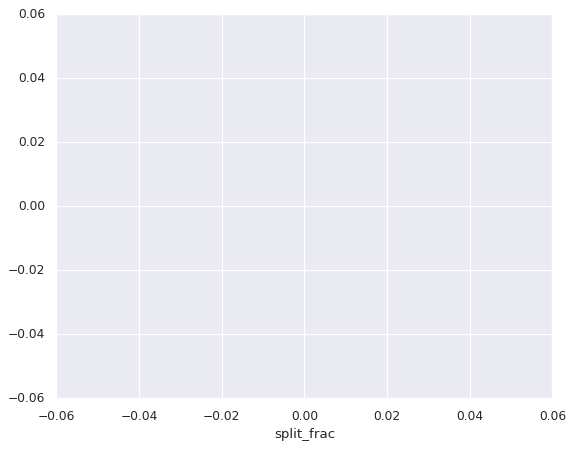

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

В результате выполнения этого кода на одном графике будут отображены две оценки плотности (KDE) для переменной split_frac: одна для мужчин и другая для женщин. Заполнение под графиками с помощью параметра shade=True делает график более наглядным и удобным для сравнения распределений. Легенда будет содержать метки "men" и "women", которые помогут идентифицировать цвета и значения для каждой группы. Такой подход позволяет анализировать, как распределение значения split_frac изменяется в зависимости от пола, выявляя возможные различия в поведении или характеристиках между мужчинами и женщинами.

Интересно то, что мужчин, которые баллотируются почти поровну, гораздо больше, чем женщин! Это почти похоже на некое бимодальное распределение среди мужчин и женщин. Давайте посмотрим, сможем ли мы разобраться в том, что происходит, взглянув на распределение в зависимости от возраста.

Хороший способ сравнить распределения — использовать график скрипки.

<ipython-input-52-4b4e52a4175e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gender", y="split_frac", data=data,


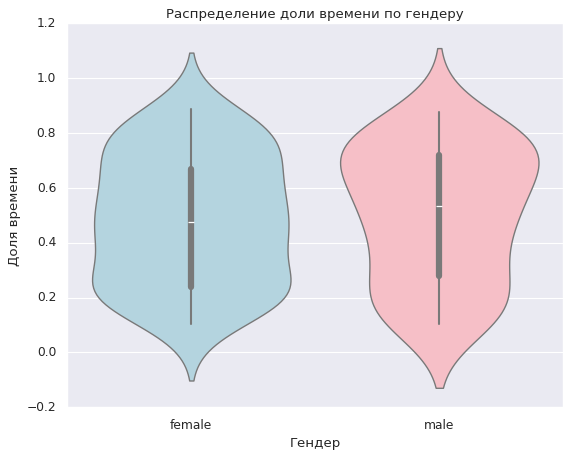

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
data_dict = {
    'split_frac': np.random.uniform(0.1, 0.9, size=100),  # Доля времени (примерные значения)
    'gender': np.random.choice(['male', 'female'], size=100)  # Гендер
}

# Преобразование в DataFrame
data = pd.DataFrame(data_dict)

# Создание виолинного графика
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"])

# Отображение графика
plt.title('Распределение доли времени по гендеру')  # Заголовок
plt.xlabel('Гендер')                               # Подпись оси X
plt.ylabel('Доля времени')                         # Подпись оси Y
plt.show()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
data_dict = {
    'split_frac': np.random.uniform(0.1, 0.9, size=100),  # Доля времени (примерные значения)
    'gender': np.random.choice(['male', 'female'], size=100)  # Гендер
}

# Преобразование в DataFrame
data = pd.DataFrame(data_dict)

# Создание виолинного графика
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"])

# Отображение графика
plt.title('Распределение доли времени по гендеру')  # Заголовок
plt.xlabel('Гендер')                               # Подпись оси X
plt.ylabel('Доля времени')                         # Подпись оси Y
plt.show()

Это еще один способ сравнить распределение между мужчинами и женщинами.

Давайте посмотрим немного глубже и сравним эти скрипичные сюжеты в зависимости от возраста. Начнем с создания нового столбца в массиве, в котором будет указано десятилетие возраста каждого человека:

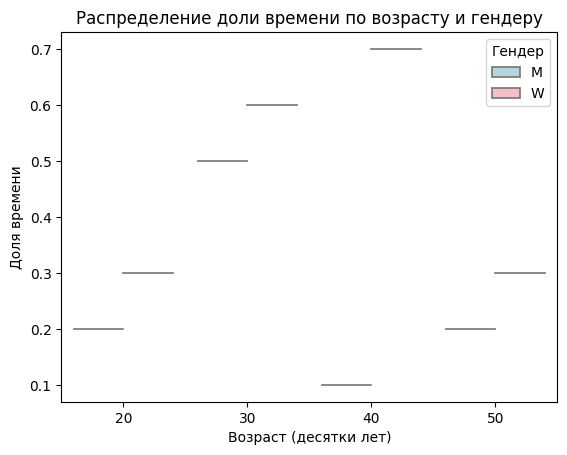

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
data_dict = {
    'age_dec': [20, 20, 30, 30, 40, 40, 50, 50],
    'split_frac': [0.2, 0.3, 0.5, 0.6, 0.1, 0.7, 0.2, 0.3],
    'gender': ['M', 'W', 'M', 'W', 'M', 'W', 'M', 'W']  # Пример гендера
}

# Преобразование в DataFrame
data = pd.DataFrame(data_dict)

# Построение виолинного графика
sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
               split=True, inner="quartile", palette=["lightblue", "lightpink"])

plt.title('Распределение доли времени по возрасту и гендеру')  # Заголовок
plt.xlabel('Возраст (десятки лет)')                             # Подпись оси X
plt.ylabel('Доля времени')                                      # Подпись оси Y
plt.legend(title='Гендер')                                      # Заголовок для легенды
plt.show()                                                     # Отображение графика

В результате выполнения этого кода будет создан виолиновый график, который показывает распределение значений split_frac для различных возрастных категорий, отдельно для мужчин и женщин. Виолиновый график позволяет визуально анализировать различия в распределении между полами для каждого возраста, выявляя потенциальные тенденции и закономерности. Такой график полезен для анализа данных, когда нужно понять, как ведут себя разные группы в зависимости от возрастной категории.

Глядя на это, мы можем увидеть, где различия в распределении мужчин и женщин: распределение мужчин в возрасте от 20 до 50 лет демонстрирует явно выраженную чрезмерную плотность в сторону более низкого разделения по сравнению с женщинами того же возраста (или любого возраста, если уж на то пошло).

Также удивительно, что 80-летние женщины, похоже, превосходят всех по показателям промежуточного времени. Вероятно, это связано с тем, что мы оцениваем распределение по небольшим числам, поскольку в этом диапазоне всего несколько бегунов:

Вернемся к мужчинам с отрицательным сплитом: кто эти бегуны? Коррелирует ли эта дробная часть с быстрым завершением? Мы можем это очень легко построить. Мы будем использовать regplot, который автоматически подгонит линейную регрессию к данным:

Судя по всему, люди с быстрым шпагатом — это элитные бегуны, которые финишируют примерно за 15 000 секунд, или около 4 часов. У людей, которые медленнее этого, гораздо меньше шансов получить быстрый второй сплит.